# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

#assign variable for OpenWeatherMap API 
weather_url = "http://api.openweathermap.org/data/2.5/weather?q="

#assign variables for starting numbers
rec_num = 1
set_num = 1
city_data = []
# City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"

print(f"""
Beginning Data Retrieval     
-----------------------------
    """)
#for loop through cities and print logs
for city in cities:
    try:
        #get json objects from api
        query_url = weather_url + city + "&units=imperial"+"&appid=" + weather_api_key
        response = requests.get(query_url).json()
        
        #obtain json data to create dataframe
        city_name = response["name"]
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_cloudiness = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        
        #add city information to city_data
        city_data.append({"City":city_name,
                          "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_cloudiness,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date})
        
        
        
        print(f"Processing Record {rec_num} of Set {set_num} | {city_name}""")
        
        if rec_num == 50:
            rec_num = 1
            set_num +=1
        else:
            rec_num +=1
    #if the city is not found, print "City not found. Skipping..."        
    except (KeyError):
        print("City not found. Skipping...")
print(f"""-----------------------------
Data Retrieval Complete      
-----------------------------""")
    


Beginning Data Retrieval     
-----------------------------
    
Processing Record 1 of Set 1 | Vaini
Processing Record 2 of Set 1 | Ushuaia
Processing Record 3 of Set 1 | Bredasdorp
Processing Record 4 of Set 1 | Peñarroya-Pueblonuevo
Processing Record 5 of Set 1 | Puerto Ayora
Processing Record 6 of Set 1 | Polson
Processing Record 7 of Set 1 | Canutama
Processing Record 8 of Set 1 | Kapaa
Processing Record 9 of Set 1 | Hong Kong
Processing Record 10 of Set 1 | Dikson
Processing Record 11 of Set 1 | Grasse
Processing Record 12 of Set 1 | Atuona
Processing Record 13 of Set 1 | Bluff
Processing Record 14 of Set 1 | Bud
City not found. Skipping...
Processing Record 15 of Set 1 | Qaanaaq
Processing Record 16 of Set 1 | Ugoofaaru
Processing Record 17 of Set 1 | Jamestown
Processing Record 18 of Set 1 | Avarua
Processing Record 19 of Set 1 | Saint-Philippe
Processing Record 20 of Set 1 | East London
Processing Record 21 of Set 1 | Bethel
Processing Record 22 of Set 1 | Shelopugino
Process

Processing Record 37 of Set 4 | Ibrā’
City not found. Skipping...
Processing Record 38 of Set 4 | Prince Rupert
Processing Record 39 of Set 4 | Sioux Lookout
Processing Record 40 of Set 4 | Mezhdurechensk
Processing Record 41 of Set 4 | Grindavik
City not found. Skipping...
Processing Record 42 of Set 4 | Lompoc
Processing Record 43 of Set 4 | Arinos
Processing Record 44 of Set 4 | Mendi
Processing Record 45 of Set 4 | Bose
Processing Record 46 of Set 4 | Puerto del Rosario
Processing Record 47 of Set 4 | Caxito
Processing Record 48 of Set 4 | Fare
Processing Record 49 of Set 4 | Kununurra
Processing Record 50 of Set 4 | Panacan
Processing Record 1 of Set 5 | Bengkulu
Processing Record 2 of Set 5 | Pontal do Paraná
Processing Record 3 of Set 5 | Atambua
Processing Record 4 of Set 5 | Pisco
Processing Record 5 of Set 5 | Aksarka
Processing Record 6 of Set 5 | Evensk
Processing Record 7 of Set 5 | Esperance
Processing Record 8 of Set 5 | Isangel
Processing Record 9 of Set 5 | Goderich
Pr

Processing Record 22 of Set 8 | Comodoro Rivadavia
Processing Record 23 of Set 8 | Cayenne
Processing Record 24 of Set 8 | Lugovoy
Processing Record 25 of Set 8 | Kerva
Processing Record 26 of Set 8 | Chimbote
Processing Record 27 of Set 8 | Chara
Processing Record 28 of Set 8 | Sabang
Processing Record 29 of Set 8 | Lebu
Processing Record 30 of Set 8 | Jiaojiang
Processing Record 31 of Set 8 | Brae
Processing Record 32 of Set 8 | Majene
Processing Record 33 of Set 8 | Pacific Grove
Processing Record 34 of Set 8 | Plettenberg Bay
Processing Record 35 of Set 8 | Korhogo
Processing Record 36 of Set 8 | Pokrovskoye
Processing Record 37 of Set 8 | Gongzhuling
Processing Record 38 of Set 8 | Dayong
Processing Record 39 of Set 8 | La Santisima Trinidad
Processing Record 40 of Set 8 | Trelew
Processing Record 41 of Set 8 | Seddon
Processing Record 42 of Set 8 | Nishihara
Processing Record 43 of Set 8 | Ulladulla
City not found. Skipping...
Processing Record 44 of Set 8 | Zyryanka
Processing R

Processing Record 9 of Set 12 | Kurchum
Processing Record 10 of Set 12 | Senador José Porfírio
Processing Record 11 of Set 12 | Vostok
Processing Record 12 of Set 12 | Fairview
Processing Record 13 of Set 12 | Taree
Processing Record 14 of Set 12 | Cabedelo
Processing Record 15 of Set 12 | Samaná
Processing Record 16 of Set 12 | Abu Dhabi
Processing Record 17 of Set 12 | Wagga Wagga
Processing Record 18 of Set 12 | Barra do Garças
Processing Record 19 of Set 12 | Ryomgård
-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame(city_data)
df.to_csv("city_data",encoding='utf-8', index=False)

In [5]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,78.96,73,20,11.50,TO,1635034722
1,Ushuaia,-54.8000,-68.3000,35.26,80,90,18.41,AR,1635034628
2,Bredasdorp,-34.5322,20.0403,49.32,87,24,4.61,ZA,1635034724
3,Peñarroya-Pueblonuevo,38.3000,-5.2667,57.45,48,43,2.10,ES,1635034937
4,Puerto Ayora,-0.7393,-90.3518,69.26,87,90,9.22,EC,1635034717


In [6]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,19.193599,22.869058,59.926608,72.924429,57.456942,7.638893,1.635035e+09
std,33.426081,89.162704,20.235584,18.641340,37.527905,5.450586,1.434692e+02
min,-54.800000,-175.200000,-6.720000,10.000000,0.000000,0.000000,1.635034e+09
25%,-8.190000,-53.673500,45.720000,64.000000,20.000000,3.400000,1.635035e+09
50%,22.678300,25.570100,63.360000,77.000000,71.000000,6.670000,1.635035e+09
75%,48.583900,107.512500,77.160000,86.000000,93.000000,10.600000,1.635035e+09
max,78.218600,178.416700,94.500000,100.000000,100.000000,30.800000,1.635035e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#check for cities with humidity over 100%
df["Humidity"].unique()

array([ 73,  80,  87,  48,  65,  71,  75,  79,  76,  77,  92,  82,  57,
        72,  95,  84,  66,  68,  78,  86,  70,  69,  81,  62,  64,  94,
        90,  67,  63,  89,  85,  93,  58,  98,  45,  59,  50,  16,  51,
        83,  88,  19,  21,  49,  74,  56,  91,  61,  99, 100,  46,  39,
        60,  96,  23,  97,  22,  26,  15,  31,  42,  29,  18,  43,  34,
        54,  30,  44,  33,  37,  24,  53,  28,  14,  20,  32,  27,  55,
        41,  52,  10])

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
renamed_df = df.rename(columns={'Lat': 'Latitude', 
                        'Max Temp': 'Max Temperature (F)',
                        'Humidity': 'Humidity (%)',
                        'Cloudiness': 'Cloudiness (%)',
                        'Wind Speed': 'Wind Speed (mph)'
                       })


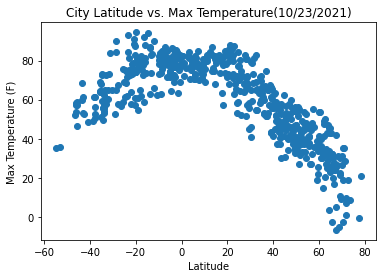

<Figure size 432x288 with 0 Axes>

In [11]:
x_values = renamed_df["Latitude"]
y_values = renamed_df["Max Temperature (F)"]

plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature(10/23/2021)")
plt.show()
plt.savefig('Latitude vs. Temperature Plot.png')

## Latitude vs. Humidity Plot

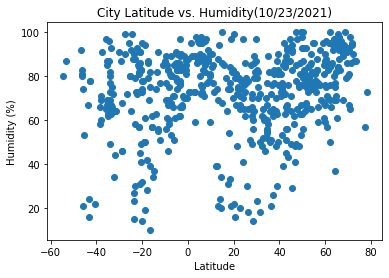

<Figure size 432x288 with 0 Axes>

In [12]:
x_values = renamed_df["Latitude"]
y_values = renamed_df["Humidity (%)"]

plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity(10/23/2021)")
plt.show()
plt.savefig('Latitude vs. Humidity Plot.png')

## Latitude vs. Cloudiness Plot

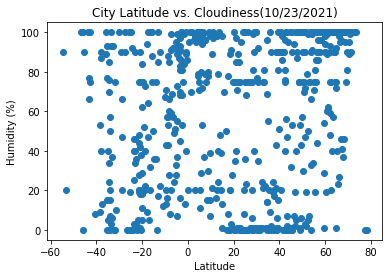

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = renamed_df["Latitude"]
y_values = renamed_df["Cloudiness (%)"]

plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Cloudiness(10/23/2021)")
plt.show()
plt.savefig('Latitude vs. Cloudiness Plot.png')

## Latitude vs. Wind Speed Plot

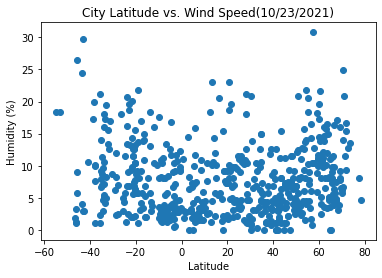

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = renamed_df["Latitude"]
y_values = renamed_df["Wind Speed (mph)"]

plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Wind Speed(10/23/2021)")
plt.show()
plt.savefig('Latitude vs. Wind Speed Plot.png')

## Linear Regression

In [15]:
north_df = renamed_df

In [16]:
north_df.drop(north_df.loc[north_df["Latitude"]<0].index, inplace=True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7902605523444953


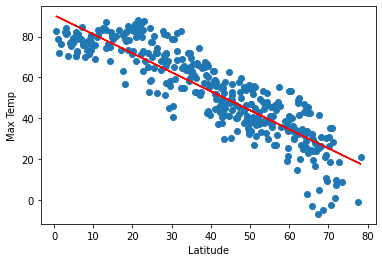

<Figure size 432x288 with 0 Axes>

In [17]:
north_df
x_values = north_df["Latitude"]
y_values = north_df["Max Temperature (F)"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# # Get regression values
regress_values = x_values * slope + intercept


# # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.show()
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.47507214886287974


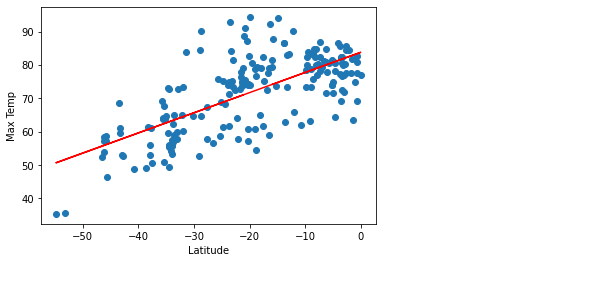

<Figure size 432x288 with 0 Axes>

In [18]:
south_df = df
south_df.drop(south_df.loc[south_df["Lat"]>0].index, inplace=True)
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02818762517378041


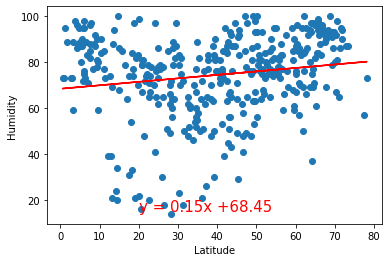

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = north_df["Latitude"]
y_values = north_df["Humidity (%)"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02147940835979094


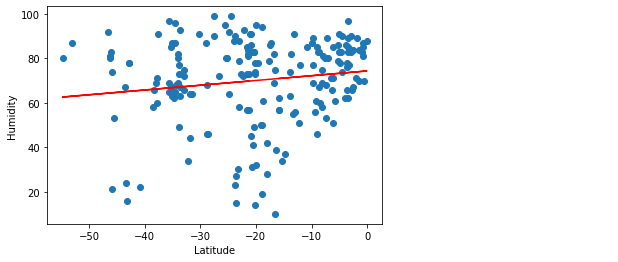

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.030382158043703603


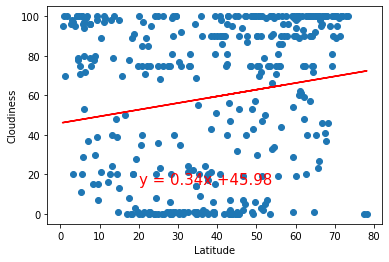

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness (%)"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00638467305480798


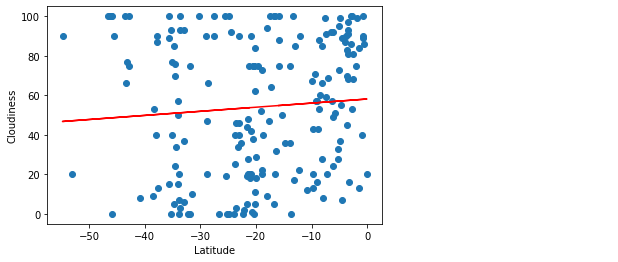

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05556285376332275


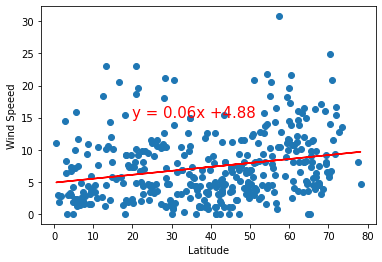

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed (mph)"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeed")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08102706312767347


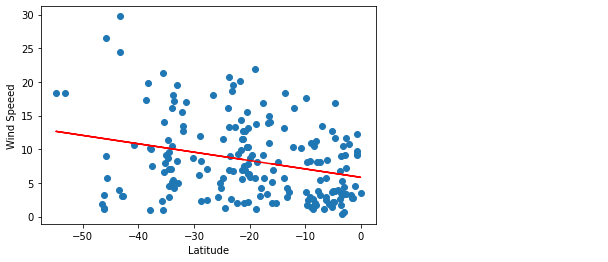

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeed")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')